In [1]:
%matplotlib inline
# Handle table-like data and matrices
import numpy as np
import pandas as pd
import re

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LassoLarsCV,Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, RandomForestRegressor

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

# Visualisation
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)

C:\Users\kefor\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
domesticdf = pd.read_csv('Domestic_Violence_Dashboard_data.csv')
mapdf = pd.read_csv('Incident_Map_data.csv')
trafficdf = pd.read_csv('Traffic_Stops_Dashboard_data.csv')
wholedf = pd.read_csv('Use_of_Force.csv')

In [8]:
test = domesticdf[['Offense','Relationship']]

domesticdf['mean'] = domesticdf.Id.mean()

domesticdf

,Number of Records,Offense,Relationship,Suspect Age At Incident,Suspect Gender,Victim Age At Incident,Victim Gender,Weapon Type,Alcohol,Call Date/Time,Dcf Notified,Drug Related,Id,Incident Number,Mental Health Related,Offense Violation Type Id,mean
0,1,Violation Of An Abuse Prevention Order 13 VSA ...,Victim was Ex-Spouse -XS,44.0,Male - M,37.0,Female - F,NaN,Yes,10/3/2011 11:03:00 AM,0.0,0,739,11BU023244,0,2249,364600.176528
1,1,Domestic Assault 13 VSA 1042 13B,Victim was Friend - FR,33.0,Female - F,32.0,Female - F,NaN,Yes,10/3/2011 5:00:19 PM,0.0,0,782,11BU023285,0,2233,364600.176528
2,1,Domestic Assault 13 VSA 1042 13B,Victim was Friend - FR,32.0,Female - F,33.0,Female - F,NaN,Yes,10/3/2011 5:00:19 PM,0.0,0,795,11BU023285,0,2233,364600.176528
3,1,Domestic Assault 13 VSA 1042 13B,Victim was Offender - VO,32.0,Female - F,33.0,Female - F,NaN,Yes,10/3/2011 5:00:19 PM,0.0,0,782,11BU023285,0,2233,364600.176528
4,1,Domestic Assault 13 VSA 1042 13B,Victim was Offender - VO,33.0,Female - F,32.0,Female - F,NaN,Yes,10/3/2011 5:00:19 PM,0.0,0,795,11BU023285,0,2233,364600.176528
5,1,Domestic Assault 13 VSA 1042 13B,Victim was Same Sex Relationship - HR,21.0,Female - F,20.0,Female - F,NaN,Yes,10/5/2011 10:05:02 PM,0.0,0,978,11BU023473,0,2233,364600.176528
6,1,Domestic Assault 13 VSA 1042 13B,Victim was Common-Law Spouse - CS,56.0,Male - M,59.0,Female - F,NaN,Yes,10/8/2011 8:41:00 PM,0.0,0,1223,11BU023715,0,2233,364600.176528
7,1,Domestic Assault 13 VSA 1042 13B,Victim was Boyfriend/Girlfriend - BG,25.0,Male - M,25.0,Female - F,NaN,1,10/10/2011 2:42:00 AM,0.0,0,1361,11BU023850,0,2233,364600.176528
8,1,Violation Of An Abuse Prevention Order 13 VSA ...,Victim was Boyfriend/Girlfriend - BG,27.0,Male - M,27.0,Female - F,NaN,Yes,10/10/2011 6:13:28 AM,0.0,0,1367,11BU023856,0,2249,364600.176528
9,1,Domestic Assault 13 VSA 1042 13B,Victim was Boyfriend/Girlfriend - BG,38.0,Male - M,22.0,Female - F,NaN,Yes,10/11/2011 1:02:00 PM,0.0,0,1509,11BU023991,0,2233,364600.176528


In [11]:
test = domesticdf[[col for col in domesticdf if col.startswith('S')]]
test

,Suspect Age At Incident,Suspect Gender
0,44.0,Male - M
1,33.0,Female - F
2,32.0,Female - F
3,32.0,Female - F
4,33.0,Female - F
5,21.0,Female - F
6,56.0,Male - M
7,25.0,Male - M
8,27.0,Male - M
9,38.0,Male - M


In [5]:
domesticdf.info()

,Number of Records,Offense,Relationship,Suspect Age At Incident,Suspect Gender,Victim Age At Incident,Victim Gender,Weapon Type,Alcohol,Call Date/Time,Dcf Notified,Drug Related,Id,Incident Number,Mental Health Related,Offense Violation Type Id
0,1,Violation Of An Abuse Prevention Order 13 VSA ...,Victim was Ex-Spouse -XS,44.0,Male - M,37.0,Female - F,NaN,Yes,10/3/2011 11:03:00 AM,0.0,0,739,11BU023244,0,2249
1,1,Domestic Assault 13 VSA 1042 13B,Victim was Friend - FR,33.0,Female - F,32.0,Female - F,NaN,Yes,10/3/2011 5:00:19 PM,0.0,0,782,11BU023285,0,2233
2,1,Domestic Assault 13 VSA 1042 13B,Victim was Friend - FR,32.0,Female - F,33.0,Female - F,NaN,Yes,10/3/2011 5:00:19 PM,0.0,0,795,11BU023285,0,2233
3,1,Domestic Assault 13 VSA 1042 13B,Victim was Offender - VO,32.0,Female - F,33.0,Female - F,NaN,Yes,10/3/2011 5:00:19 PM,0.0,0,782,11BU023285,0,2233
4,1,Domestic Assault 13 VSA 1042 13B,Victim was Offender - VO,33.0,Female - F,32.0,Female - F,NaN,Yes,10/3/2011 5:00:19 PM,0.0,0,795,11BU023285,0,2233


In [10]:
domesticdf['Call Date/Time'] = pd.to_datetime(domesticdf['Call Date/Time'])


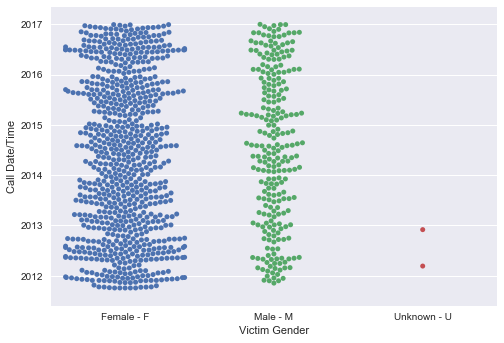

In [12]:
sns.swarmplot(x='Victim Gender', y='Call Date/Time', data=domesticdf)

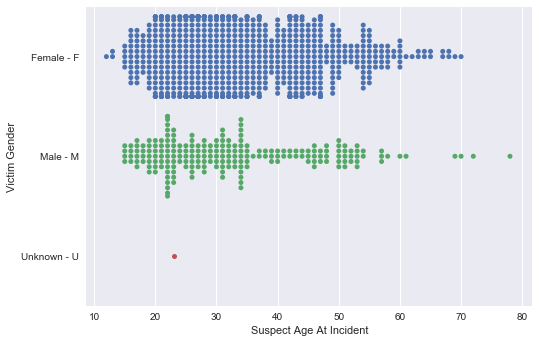

In [15]:

sns.swarmplot(x='Suspect Age At Incident', y='Victim Gender', data=domesticdf)

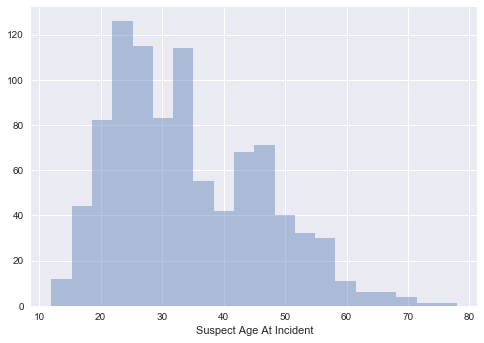

In [37]:
data = domesticdf[(domesticdf['Suspect Age At Incident'].notnull())]
data = data['Suspect Age At Incident']
sns.distplot(data, kde=False, bins=40)



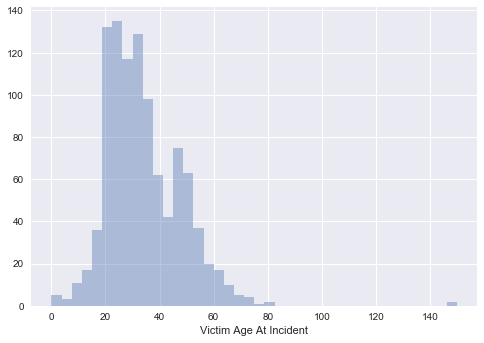

In [54]:
data = domesticdf[(domesticdf['Victim Age At Incident'].notnull())]
data = data['Victim Age At Incident']
sns.distplot(data, kde=False, bins=40)

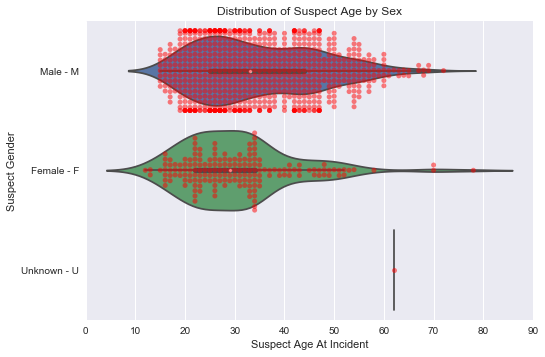

In [42]:
data = domesticdf[(domesticdf['Victim Gender'] != "Unknown - U")]
sns.violinplot(x='Suspect Age At Incident', y='Suspect Gender', data=data)
sns.swarmplot(x='Suspect Age At Incident', y='Suspect Gender', data=data, color="r", alpha=.5)
plt.title('Distribution of Suspect Age by Sex')
plt.show()

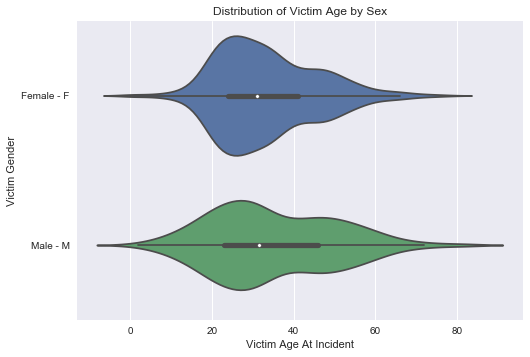

In [39]:
data = domesticdf[(domesticdf['Victim Gender'] != "Unknown - U")]
sns.violinplot(x='Victim Age At Incident', y='Victim Gender', data=data)
plt.title('Distribution of Victim Age by Sex')
plt.show()

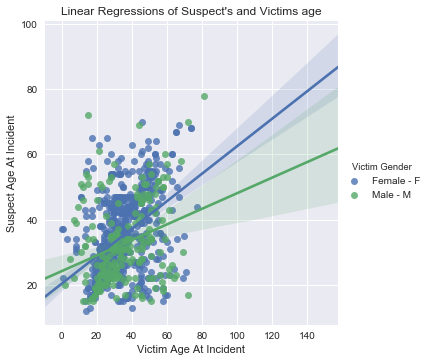

In [32]:
data = domesticdf[(domesticdf['Victim Gender'] != "Unknown - U")]
sns.lmplot(y='Suspect Age At Incident', x='Victim Age At Incident', hue='Victim Gender', data=data)
plt.title("Linear Regressions of Suspect's and Victims age")
plt.show()

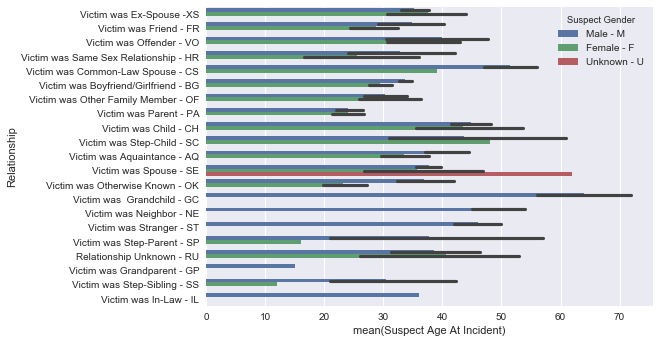

In [44]:
data = domesticdf
sns.barplot(x='Suspect Age At Incident', y='Relationship', hue='Suspect Gender', data=data)

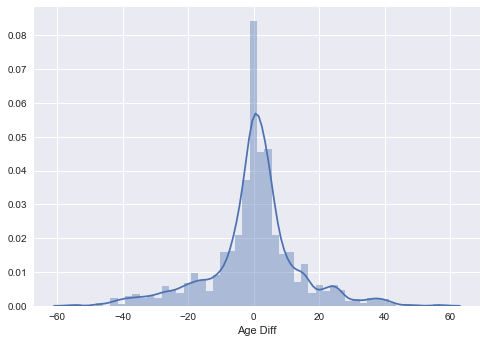

In [56]:
domesticdf['Age Diff'] = domesticdf['Suspect Age At Incident'] - domesticdf['Victim Age At Incident']

data = domesticdf[(domesticdf['Age Diff'].notnull())]
data = data[(data['Age Diff'] > -75)]

sns.distplot(data['Age Diff'])

In [53]:
domesticdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031 entries, 0 to 1030
Data columns (total 17 columns):
Number of Records            1031 non-null int64
Offense                      1031 non-null object
Relationship                 1030 non-null object
Suspect Age At Incident      943 non-null float64
Suspect Gender               943 non-null object
Victim Age At Incident       1023 non-null float64
Victim Gender                1021 non-null object
Weapon Type                  0 non-null float64
Alcohol                      692 non-null object
Call Date/Time               1031 non-null datetime64[ns]
Dcf Notified                 593 non-null float64
Drug Related                 1031 non-null int64
Id                           1031 non-null int64
Incident Number              1031 non-null object
Mental Health Related        1031 non-null int64
Offense Violation Type Id    1031 non-null int64
Age Diff                     935 non-null float64
dtypes: datetime64[ns](1), float64(5), int6